<a href="https://colab.research.google.com/github/vivek-mourya885/Learning/blob/main/Plantrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk 
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd 
df_login = pd.read_csv('drive/MyDrive/plantrix/login_logs.csv')
df_sales = pd.read_csv('drive/MyDrive/plantrix/sales_orders.csv')
df_items = pd.read_csv('drive/MyDrive/plantrix/sales_orders_items.csv')
df_comp = pd.read_csv('drive/MyDrive/plantrix/plantrix_data.csv')

In [4]:
df_login.head()


,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0


In [5]:
df_sales.head()


,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0


In [6]:
df_items.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85


In [7]:
df_login.isnull().sum()


login_log_id    0
user_id         0
login_time      0
dtype: int64

In [8]:
df_sales.isnull().sum()

order_id              0
fk_buyer_id           0
fk_depot_id           0
sales_order_status    0
creation_time         0
dtype: int64

In [9]:
df_items.isnull().sum()

order_item_id              0
fk_product_id              0
fk_order_id                0
ordered_quantity           0
order_quantity_accepted    0
rate                       0
dtype: int64

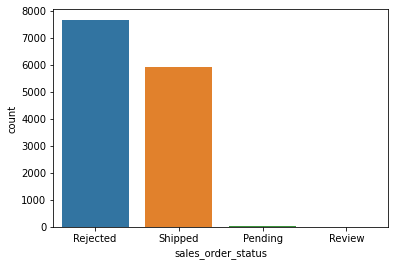

In [10]:
sns.countplot(x="sales_order_status", data= df_sales)

In [12]:
df_items['ordered_quantity'].sum()

66638

In [13]:
df_items['order_quantity_accepted'].sum()

29786

In [20]:
df_sales['creation_time'] = df_sales['creation_time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
df_sales['Month_year'] = df_sales['creation_time'].apply(lambda x: x.strftime('%Y-%m'))

In [15]:
df_sales['Month_year'].unique()

array(['2021-07', '2022-07'], dtype=object)

In [16]:
df_sales.groupby('Month_year').count()['fk_buyer_id']


Month_year
2021-07    6216
2022-07    7414
Name: fk_buyer_id, dtype: int64

In [ ]:
df_sales.groupby('Month_year').sum()['fk_buyer_id']


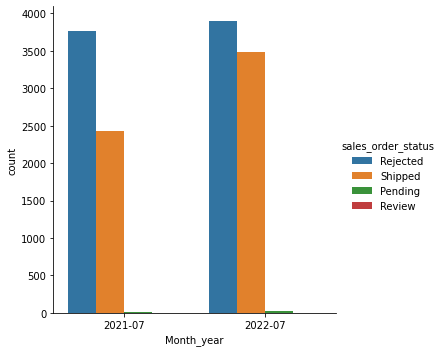

In [17]:
sns.catplot(x = 'Month_year', hue = 'sales_order_status', kind = 'count', data = df_sales)

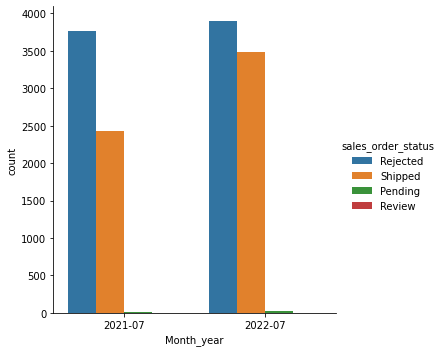

In [18]:
sns.catplot(x = 'Month_year', hue = 'sales_order_status', kind = 'count', data = df_sales)

In [19]:
df_login.head()

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0


In [36]:
df_login['login_time'] = df_login['login_time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
df_login['Month_year'] =df_login['login_time'].apply(lambda x: x.strftime('%Y-%m'))

In [21]:
df_login.groupby('Month_year').count()['user_id']

Month_year
2021-07    271240
2022-07    395117
Name: user_id, dtype: int64

[Text(0.5, 1.0, 'users percentage of july month of both years')]

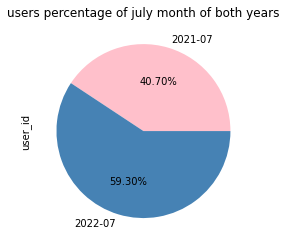

In [43]:
colors = ['pink', 'steelblue']
df_login.groupby('Month_year').count()['user_id'].plot(kind='pie', autopct='%.2f%%', colors = colors).set(title ='users percentage of july month of both years')

In [ ]:
pd.merge(df_sales,df_login)

In [5]:
(df_items.groupby('fk_product_id').count()['fk_order_id']).sort_values(ascending=False).head(10)

fk_product_id
10235    908
8444     822
1041     624
8425     590
3610     488
10975    469
1038     382
8219     362
10236    353
8210     337
Name: fk_order_id, dtype: int64

In [ ]:
df_sales.describe()


In [ ]:
df_login.describe()

In [7]:
df_comp.head()

,fk_order_id,order_item_id,fk_product_id,ordered_quantity,order_quantity_accepted,rate,sales_order_status,creation_time
0,119874,62609,7818,1,0,4993.00,Rejected,2021-07-01 00:35:28.0
1,119877,62610,7607,1,0,6203.40,Rejected,2021-07-01 02:02:43.0
2,119880,62611,9916,2,2,2904.41,Shipped,2021-07-01 02:42:12.0
3,119880,62612,11118,2,2,2205.00,Shipped,2021-07-01 02:42:12.0
4,119880,62613,12702,2,2,2200.85,Shipped,2021-07-01 02:42:12.0


In [25]:
#df_comp['creation_time'] = df_comp['creation_time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
df_comp['Year_month'] =df_comp['creation_time'].apply(lambda x: x.strftime('%Y-%m'))

In [26]:
df_comp.head()

,fk_order_id,order_item_id,fk_product_id,ordered_quantity,order_quantity_accepted,rate,sales_order_status,creation_time,Month_year,Year_month
0,119874,62609,7818,1,0,4993.00,Rejected,2021-07-01 00:35:28,2021-07,2021-07
1,119877,62610,7607,1,0,6203.40,Rejected,2021-07-01 02:02:43,2021-07,2021-07
2,119880,62611,9916,2,2,2904.41,Shipped,2021-07-01 02:42:12,2021-07,2021-07
3,119880,62612,11118,2,2,2205.00,Shipped,2021-07-01 02:42:12,2021-07,2021-07
4,119880,62613,12702,2,2,2200.85,Shipped,2021-07-01 02:42:12,2021-07,2021-07


In [31]:
(df_comp.groupby(['fk_product_id', 'Year_month']).count()['fk_order_id']).sort_values(ascending=False).head(10)

fk_product_id  Year_month
10235          2021-07       550
8444           2022-07       485
10235          2022-07       358
1041           2022-07       356
8425           2022-07       345
8444           2021-07       337
3610           2022-07       335
1548           2021-07       300
1041           2021-07       268
10975          2022-07       257
Name: fk_order_id, dtype: int64

[Text(0.5, 1.0, '% Revenue of july month of both years')]

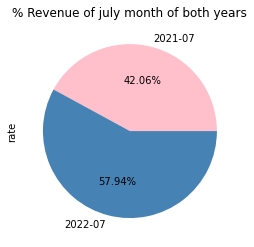

In [46]:
colors = ['pink', 'steelblue']
df_comp.groupby('Year_month').sum()['rate'].plot(kind='pie', autopct='%.2f%%', colors = colors).set(title = '% Revenue of july month of both years')

In [44]:
df_comp.groupby('Year_month').sum()['rate']

Year_month
2021-07    5.448638e+07
2022-07    7.504405e+07
Name: rate, dtype: float64

In [47]:
df_login.groupby('user_id').count()['login_log_id'].sort_values(ascending=False).head(10)

user_id
63652     3868
209276    2471
51192     2097
43108     1899
42292     1714
97272     1711
220464    1354
46516     1300
215084    1293
43180     1286
Name: login_log_id, dtype: int64

In [51]:
df_comp.groupby('Year_month').sum()['ordered_quantity']

Year_month
2021-07    31738
2022-07    34900
Name: ordered_quantity, dtype: int64

In [50]:
df_comp.groupby('Month_year').sum()['order_quantity_accepted']

Month_year
2021-07    11485
2022-07    18301
Name: order_quantity_accepted, dtype: int64